In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
from scipy.special import expit

C:\Users\celso\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def error_function(x, a, y):    
    h = expit(x.dot(a))
    error = -(1/len(y))*np.sum( y.T.dot(np.log(h)) + (1-y).T.dot(np.log((1-h) )) )
    return error

def classifier(x, a):
    h = expit(x.dot(a))
    c = np.zeros((len(h), 1))
    for i in range(0, len(h)):
        if(h[i] >= 0.5):
            c[i,0]=1.0
    return c

def predict_prob(x, a):
    h1 = expit(x.dot(a))
    h0 = 1 - h1
    h = np.c_[h0, h1]
    return h

In [3]:
x1 = np.array([0.4299, 0.4478, 0.459, 0.8426, 1.0784, 1.4681, 1.4727, 1.8422, 2.014, 2.1838, 2.4452, 2.6426, 2.8786, 3.4615, 3.6067])

x2 = np.array([1.3754, 0.5975, 2.6197, 3.662, 2.1051, 0.2585, 1.0807, 3.5898, 2.5221, 1.0768, 0.142, 3.6742,
2.1396, 3.0697, 1.2022])

y = np.array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1])
y2 = y
y = y.reshape(len(y), 1)
X = np.c_[x1, x2]

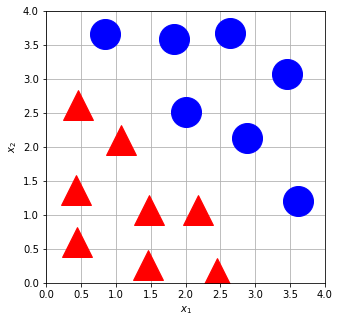

In [4]:
idx0 = np.argwhere(y2 == 0)
idx1 = np.argwhere(y2 == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(X[idx0,0], X[idx0,1], 'r^', markersize = 30, label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'bo', markersize = 30, label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.show()

In [5]:
# Batch gradient descent solution.

x_train = np.c_[np.ones((len(x1), 1)), X]

y_train = y
# learning rate.
alpha = 0.05
# Maximum number of iterations.
n_iterations = 1000

# Random initialization of parameters.
a = np.random.randn(x_train.shape[1],1)

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)

# Calculate initial error.
Jgd[0] = error_function(x_train, a, y_train)

# Batch gradient-descent loop.
minimum_val_error = float("inf")
iteration = 0
error = 1
while iteration < n_iterations:    
    gradients = -1/len(y_train)*x_train.T.dot(y_train - expit(x_train.dot(a)) )
    a = a - alpha * gradients
    Jgd[iteration+1] = error_function(x_train, a, y_train)
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    if(Jgd[iteration+1] < minimum_val_error):
        minimum_val_error = Jgd[iteration+1]
        a_min = a        
    iteration = iteration + 1

In [6]:
print(a)

[[-4.13144549]
 [ 1.04725611]
 [ 1.21217263]]
